<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Imbalanced Classification & NN***

###**Tenggat Waktu: 3 Desember 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab7_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Valencius Apriady Primayudha"
KELAS = "D"
NPM = "2106750830"
NAMA_KELOMPOK_KAGGLE = "Valencius Apriady"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Valencius Apriady Primayudha dari kelas D dengan NPM 2106750830, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Valencius Apriady Primayudha)


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from numpy import where

# Imbalanced Classification

Imbalanced classification adalah kondisi dalam masalah klasifikasi di mana distribusi kelas pada dataset tidak seimbang. Tingkat ketidakseimbangan tersebut dapat dikategorikan ke dalam 2 jenis, yaitu:

- Slight imbalance: yaitu ketidakseimbangan dengan tingkat rendah, seperti 4:6.
- Severe imbalance: yaitu ketidakseimbangan dengan tingkat yang sangat tinggi, seperti 1:100, 1:1000, ataupun lebih.

Kondisi distribusi kelas yang tidak seimbang pada dataset dapat mengakibatkan sejumlah kesalahan yang signifikan dalam proses pengklasifikasian kelas minoritas. Kelas minoritas akan sulit untuk diprediksi karena jumlah data yang mewakili kelas tersebut sangat sedikit dibandingkan dengan kelas mayoritas. Kondisi data yang tidak seimbang ini dapat menyebabkan bias dalam model klasifikasi, di mana model lebih cenderung memfokuskan pembelajaran pada karakteristik data dari kelas mayoritas sementara mengabaikan kelas minoritas.

Mengingat ini merupakan hal yang cukup umum, untuk mengatasi masalah ketidakseimbangan kelas, terdapat dua pendekatan utama yang dapat digunakan untuk mengambil sampel ulang dataset pelatihan:

- Oversampling: dalam pendekatan ini, kita menggandakan sampel dari kelas minoritas.
- Undersampling: dalam pendekatan ini, kita menghapus beberapa sampel dari kelas mayoritas untuk mencapai keseimbangan.

Dengan menggunakan fungsi `make_classification` dari library `scikit-learn`, kita dapat mensimulasikan dataset yang imbalance. Berikut merupakan contoh suatu dataset yang slight imbalance.

In [4]:
# Membuat dataset
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.6],
    flip_y=0,
    random_state=4
)

# Melihat distribusi kelas pada dataset
counter_y = Counter(y)
print(counter_y)

Counter({0: 6000, 1: 4000})


In [5]:
y

array([1, 1, 0, ..., 1, 0, 0])

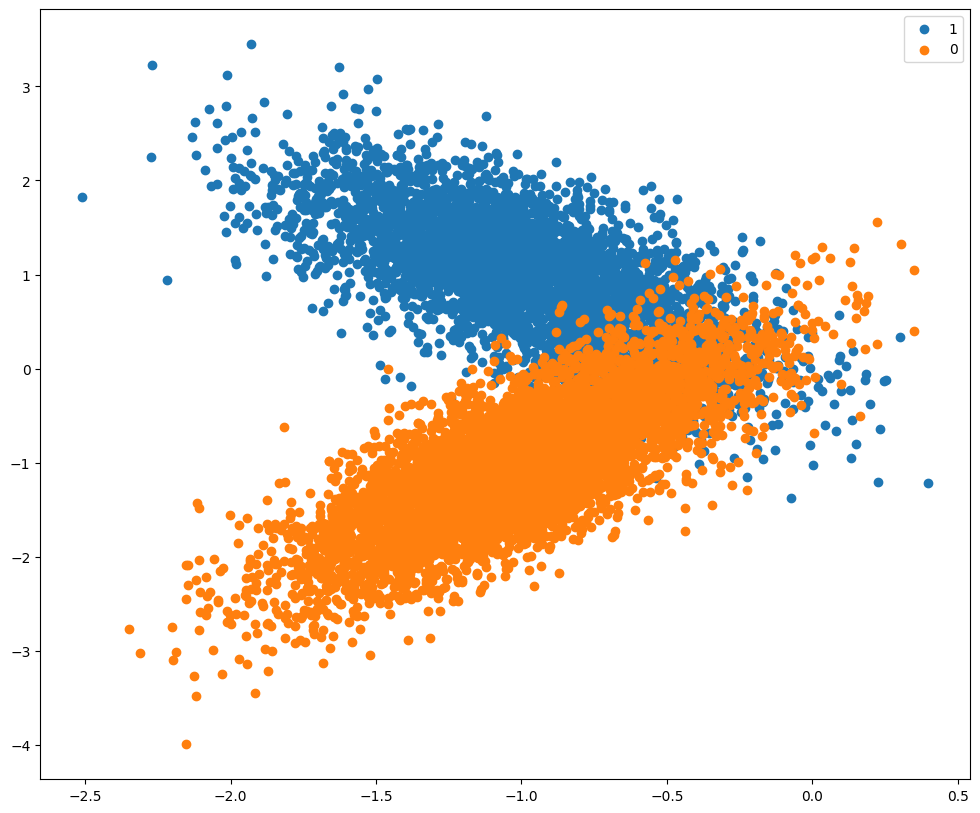

In [6]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

Dapat dilihat bahwa kelas minoritas (warna biru) memiliki jumlah yang tidak terlalu berbeda jauh jika dibandingkan dengan kelas mayoritas (warna oranye). Selanjutnya, kita akan melihat contoh dataset yang severe imbalance dengan perbandingan 99:1.

In [7]:
# Membuat dataset
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    flip_y=0,
    random_state=4
)

# Melihat distribusi kelas pada dataset
counter_y = Counter(y)
print(counter_y)

Counter({0: 9900, 1: 100})


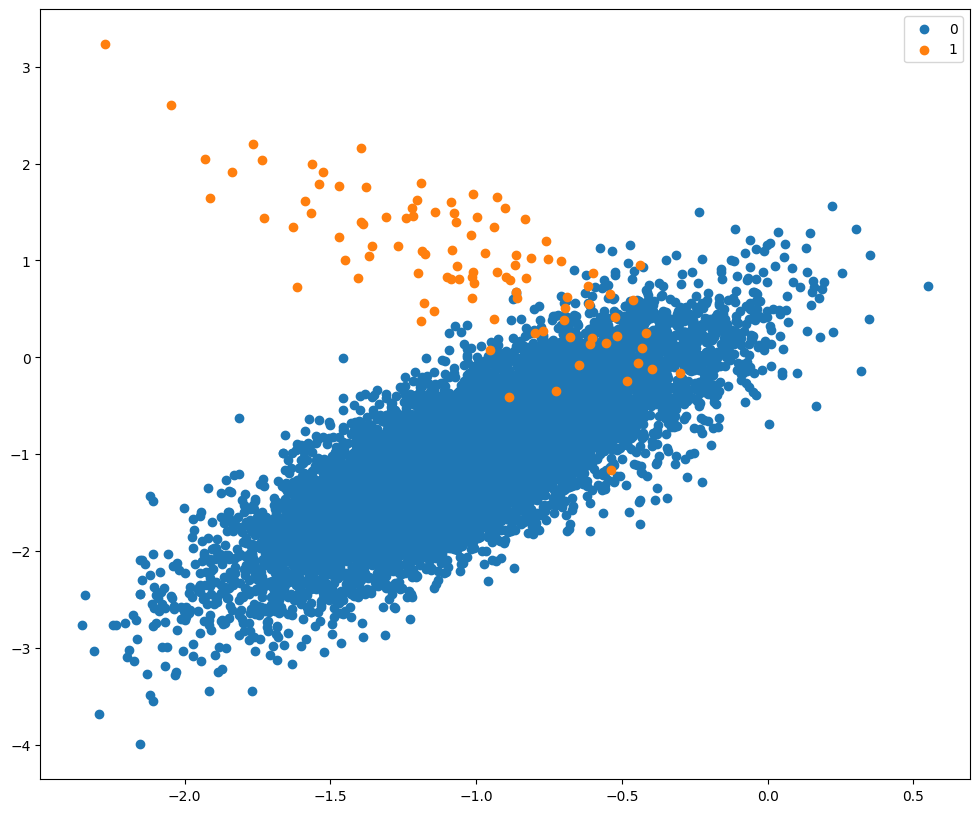

In [8]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

Terlihat jelas bahwa kelas minoritas (warna oranye) memiliki jumlah yang sangat sedikit jika dibandingkan dengan kelas mayoritas (warna biru). Dataset ini yang akan digunakan untuk menerapkan metode oversampling dan undersampling.

## Oversampling

Oversampling adalah teknik yang digunakan untuk **meningkatkan jumlah data kelas minoritas**. Dengan demikian, model klasifikasi dapat lebih mendalami karakteristik dari data minoritas. Terdapat beberapa metode dalam menerapkan oversampling, antara lain:

- Random Oversampling,
- Synthetic Minority Oversampling Technique (SMOTE),
- Borderline-SMOTE,
- Borderline Oversampling with SVM, dan
- Adaptive Synthetic Sampling (ADASYN).

Penjelasan konsep dari kelima teknik ini dapat ditemukan di dalam materi perkuliahan serta sumber-sumber yang tersedia di internet.

### Random Oversampling

Melakukan pengambilan sampel acak dari kelas minoritas dan menggandakannya dalam dataset.

In [9]:
# Inisiasi oversampler dengan metode Random Oversampling
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Melakukan resampling
X_rand_over, y_rand_over = rand_over.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

Counter({0: 9900, 1: 9900})


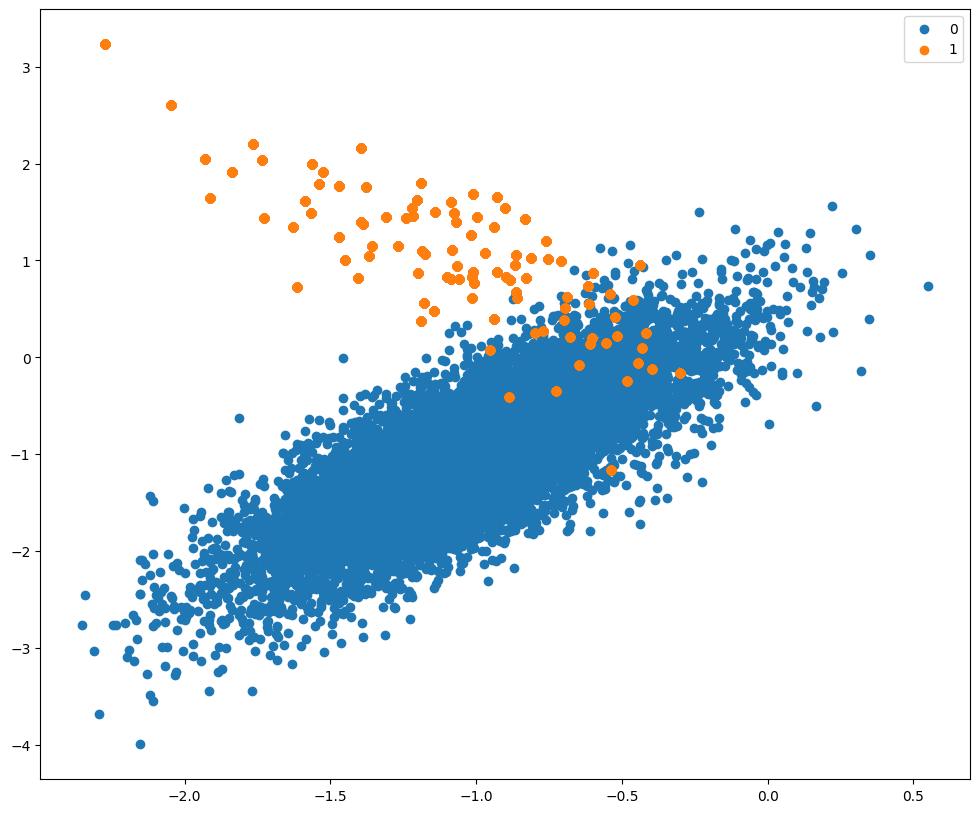

In [10]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_rand_over.items():
  row_ix = where(y_rand_over == label)[0]
  pyplot.scatter(X_rand_over[row_ix, 0], X_rand_over[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Synthetic Minority Oversampling Technique (SMOTE)

Membentuk sampel kelas minoritas tambahan dengan menggabungkan dan menghasilkan data sintetis berdasarkan sampel-sampel kelas minoritas yang telah ada.

In [11]:
# Inisiasi oversampler dengan metode SMOTE
smote = SMOTE()

# Melakukan resampling
X_smote, y_smote = smote.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({0: 9900, 1: 9900})


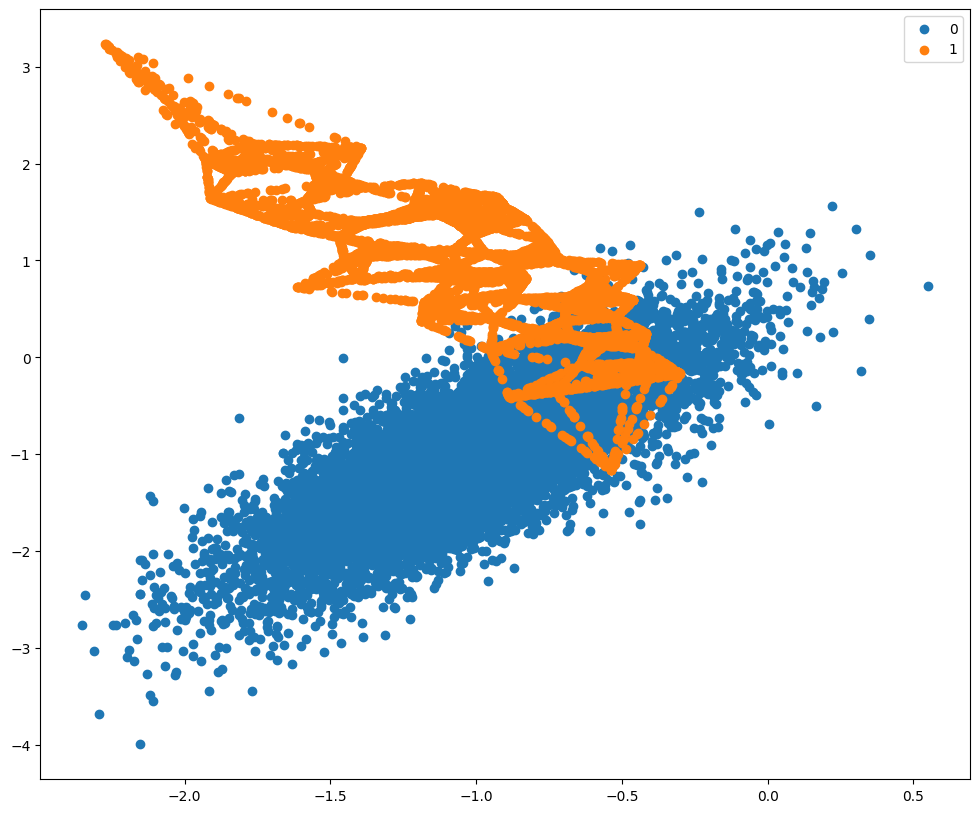

In [12]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_smote.items():
  row_ix = where(y_smote == label)[0]
  pyplot.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Borderline SMOTE

Suatu variasi (ekstensi) dari metode SMOTE. Pada Borderline-SMOTE, data sintetis dibuat secara selektif di sepanjang decision boundary antara dua kelas. Metode ini melibatkan pemilihan sampel dari kelas minoritas yang salah diklasifikasikan, misalnya, menggunakan model klasifikasi k-nearest neighbor (KNN).

In [13]:
# Inisiasi oversampler dengan metode Borderline SMOTE
borderline_smote = BorderlineSMOTE()

# Melakukan resampling
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({0: 9900, 1: 9900})


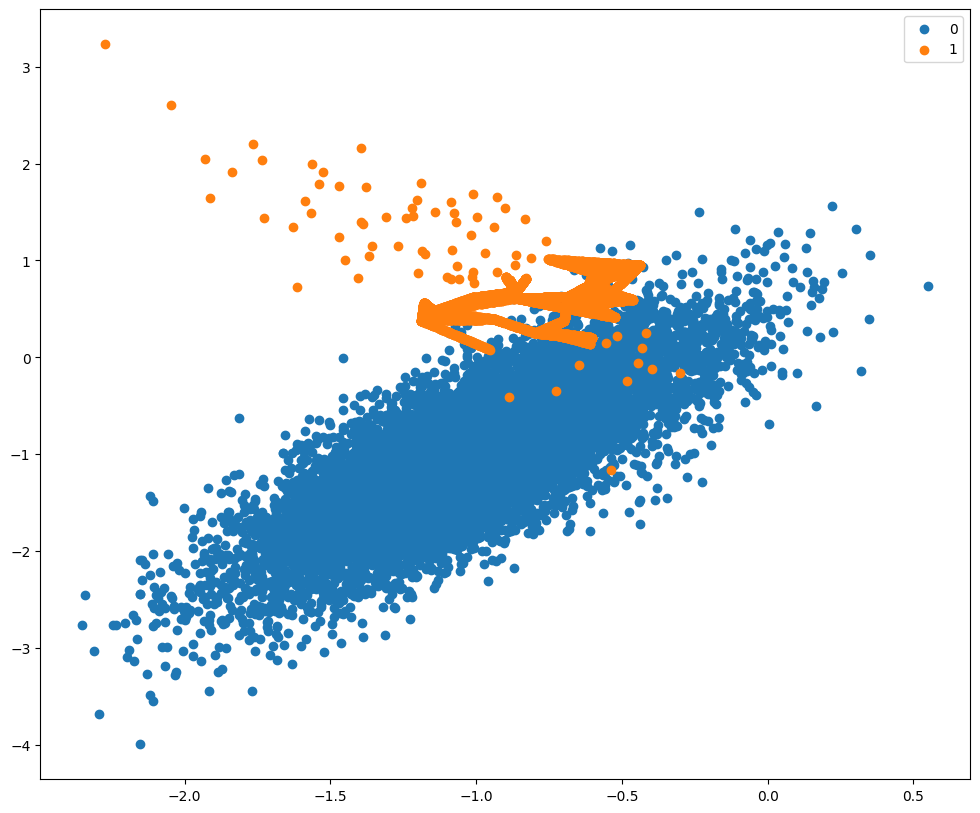

In [14]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_borderline_smote.items():
  row_ix = where(y_borderline_smote == label)[0]
  pyplot.scatter(X_borderline_smote[row_ix, 0], X_borderline_smote[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Borderline Oversampling with SVM

Merupakan variasi dari metode Borderline-SMOTE yang menggunakan algoritma SVM untuk mengidentifikasi sampel yang salah klasifikasi di sekitar decision boundary antara dua kelas.

In [15]:
# Inisiasi oversampler dengan metode Borderline SMOTE dengan SVM
svm_smote = SVMSMOTE()

# Melakukan resampling
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

Counter({0: 9900, 1: 9900})


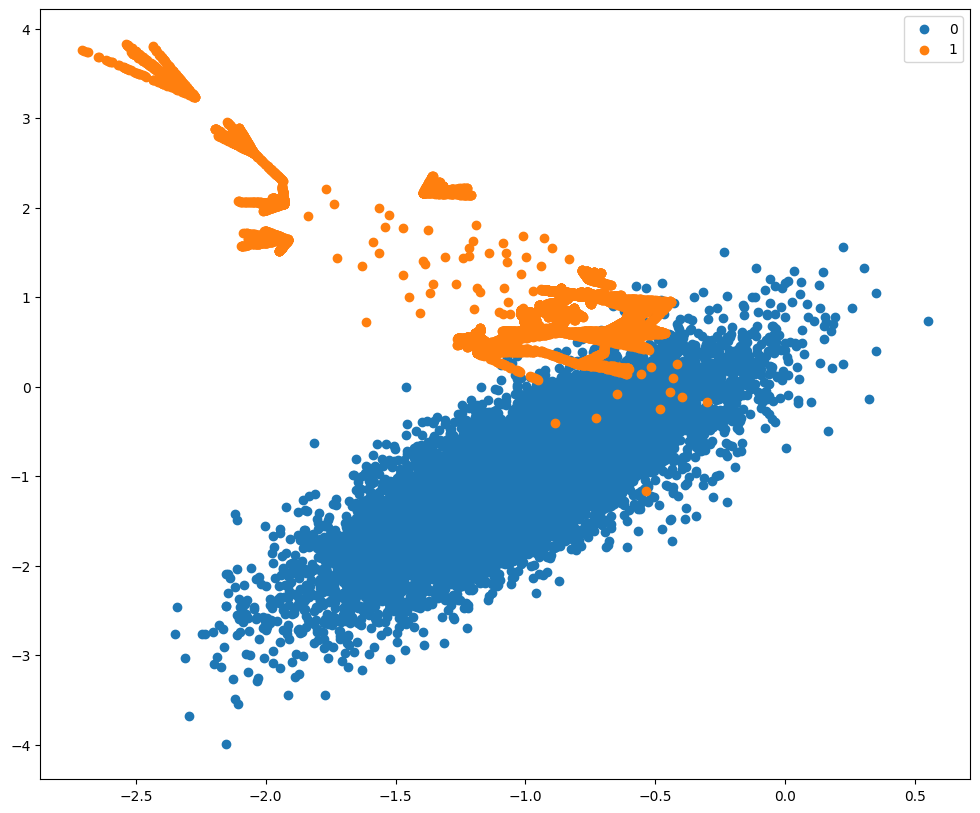

In [16]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_svm_smote.items():
  row_ix = where(y_svm_smote == label)[0]
  pyplot.scatter(X_svm_smote[row_ix, 0], X_svm_smote[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Adaptive Synthetic Sampling (ADASYN)

Secara adaptif menciptakan sampel-sampel tambahan untuk kelas minoritas berdasarkan distribusi mereka. Artinya, lebih banyak data sintetis akan dibuat untuk sampel-sampel kelas minoritas yang sulit untuk dipelajari oleh model dibandingkan dengan sampel-sampel minoritas yang lebih mudah dipelajari. Dengan kata lain, metode ini membantu model memahami lebih baik karakteristik dari kelas minoritas dengan cara menghasilkan lebih banyak data sintetis untuk kasus-kasus yang lebih sulit.

In [17]:
# Inisiasi oversampler dengan metode ADASYN
adasyn = ADASYN()

# Melakukan resampling
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

Counter({1: 9907, 0: 9900})


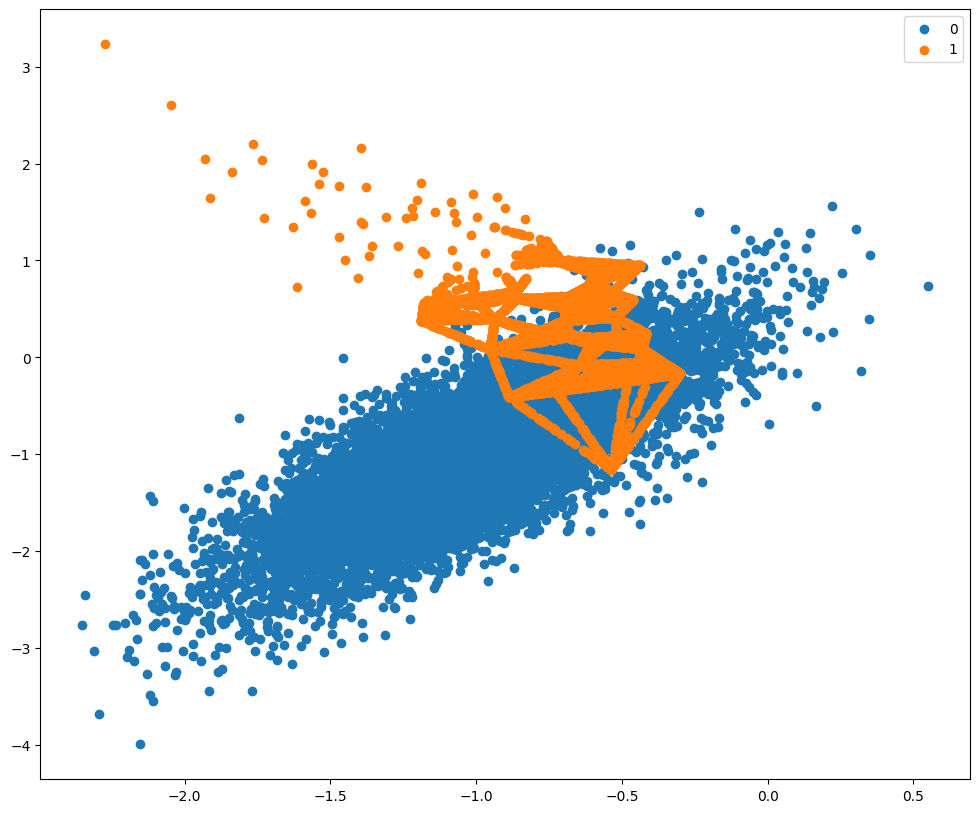

In [18]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_adasyn.items():
  row_ix = where(y_adasyn == label)[0]
  pyplot.scatter(X_adasyn[row_ix, 0], X_adasyn[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

## Undersampling

Berlawanan dengan oversampling, undersampling adalah teknik untuk **mengurangi jumlah data mayoritas**. Terdapat berbagai teknik untuk menerapkan undersampling, antara lain:

- Random Undersampling,
- Near Miss Undersampling, dan
- Tomek Link

Penjelasan konsep dari keempat teknik ini dapat ditemukan di dalam materi perkuliahan serta sumber-sumber yang tersedia di internet.

### Random Undersampling

Melakukan pengambilan sampel acak dari kelas mayoritas dan menghapusnya dalam dataset.

In [19]:
# Inisiasi undersampler dengan metode Random Undersampling
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Melakukan resampling
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

Counter({0: 100, 1: 100})


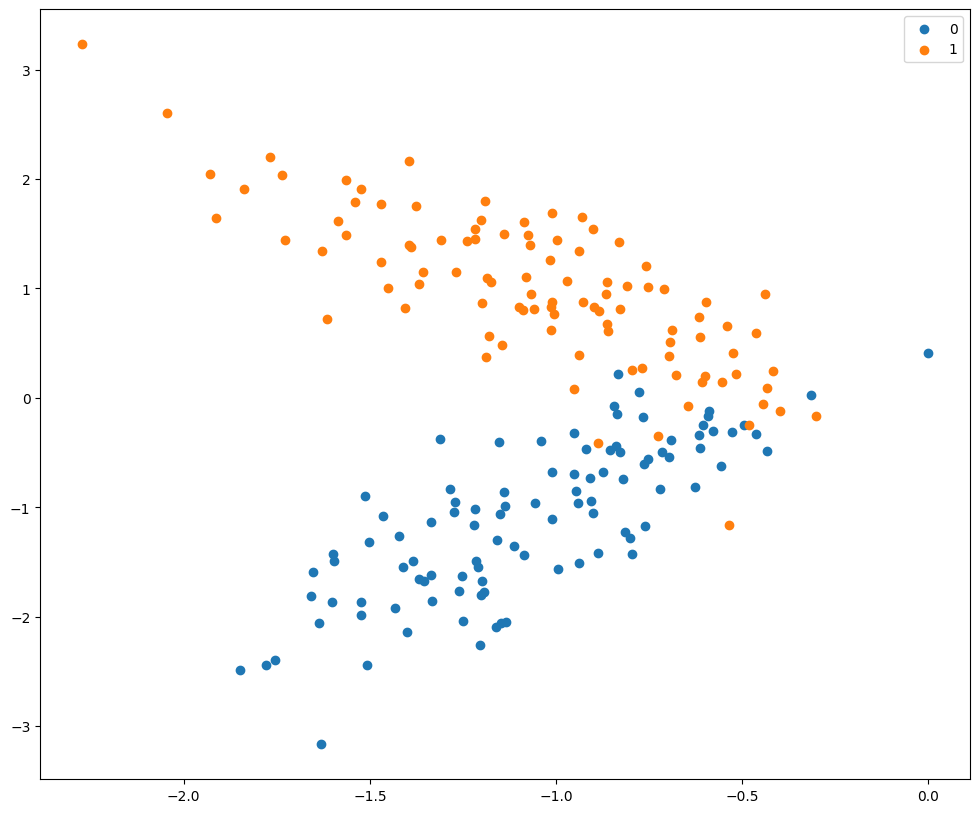

In [20]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_rand_under.items():
  row_ix = where(y_rand_under == label)[0]
  pyplot.scatter(X_rand_under[row_ix, 0], X_rand_under[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Near Miss Undersampling

Kumpulan metode undersampling yang memilih sampel berdasarkan jarak sampel kelas mayoritas ke sampel kelas minoritas. Terdapat tiga versi penerapan Near Miss, yaitu:

#### NearMiss-1

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga (adjustable) sampel kelas minoritas terdekat.

In [21]:
# Inisiasi undersampler dengan metode Near Miss 1
nearmiss = NearMiss()

# Melakukan resampling
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

Counter({0: 100, 1: 100})


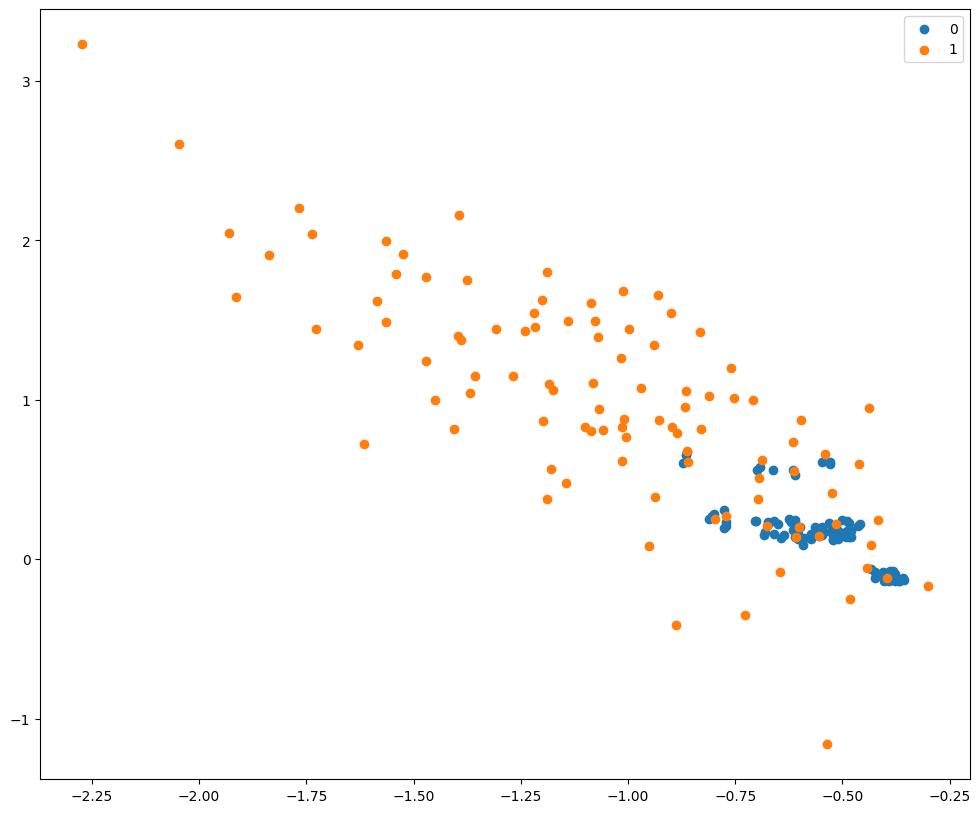

In [22]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
  row_ix = where(y_nearmiss == label)[0]
  pyplot.scatter(X_nearmiss[row_ix, 0], X_nearmiss[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

#### NearMiss-2

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga (adjustable) sampel kelas minoritas terjauh.

In [23]:
# Inisiasi undersampler dengan metode Near Miss 2
nearmiss2 = NearMiss(version=2)

# Melakukan resampling
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

Counter({0: 100, 1: 100})


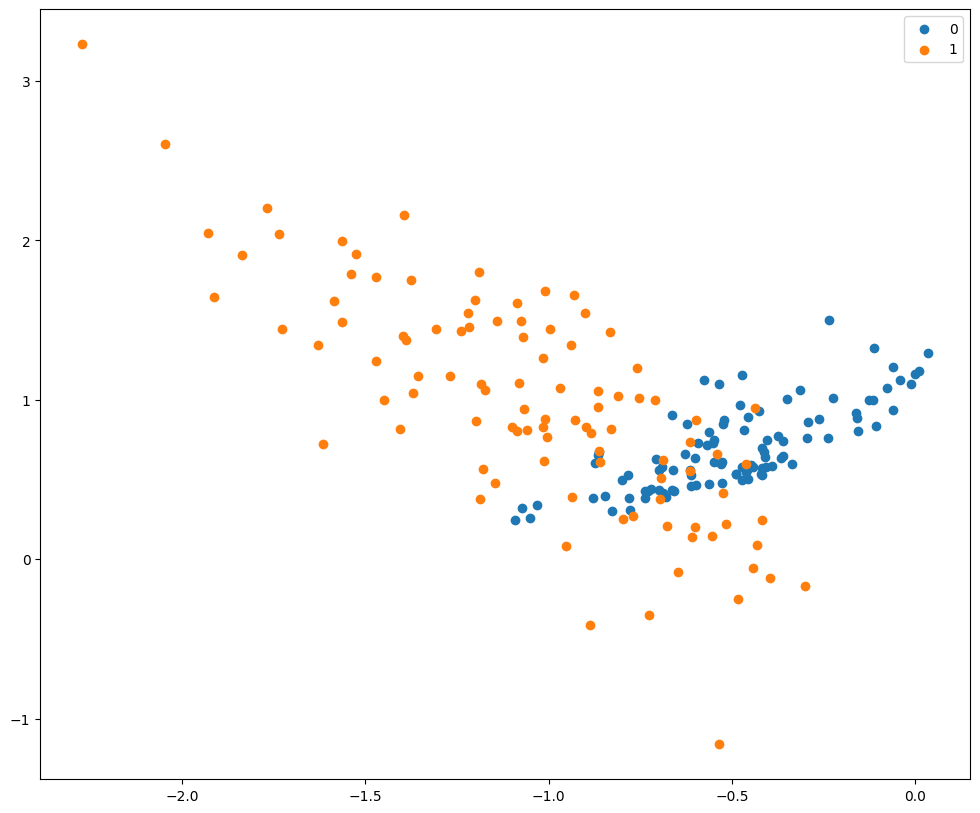

In [24]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss2.items():
  row_ix = where(y_nearmiss2 == label)[0]
  pyplot.scatter(X_nearmiss2[row_ix, 0], X_nearmiss2[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

#### NearMiss-3

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke setiap sampel kelas minoritas.

In [25]:
# Inisiasi undersampler dengan metode Near Miss 3
nearmiss3 = NearMiss(version=3)

# Melakukan resampling
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

Counter({1: 100, 0: 92})


d:\KULIAH\kasdad\lab7\env\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


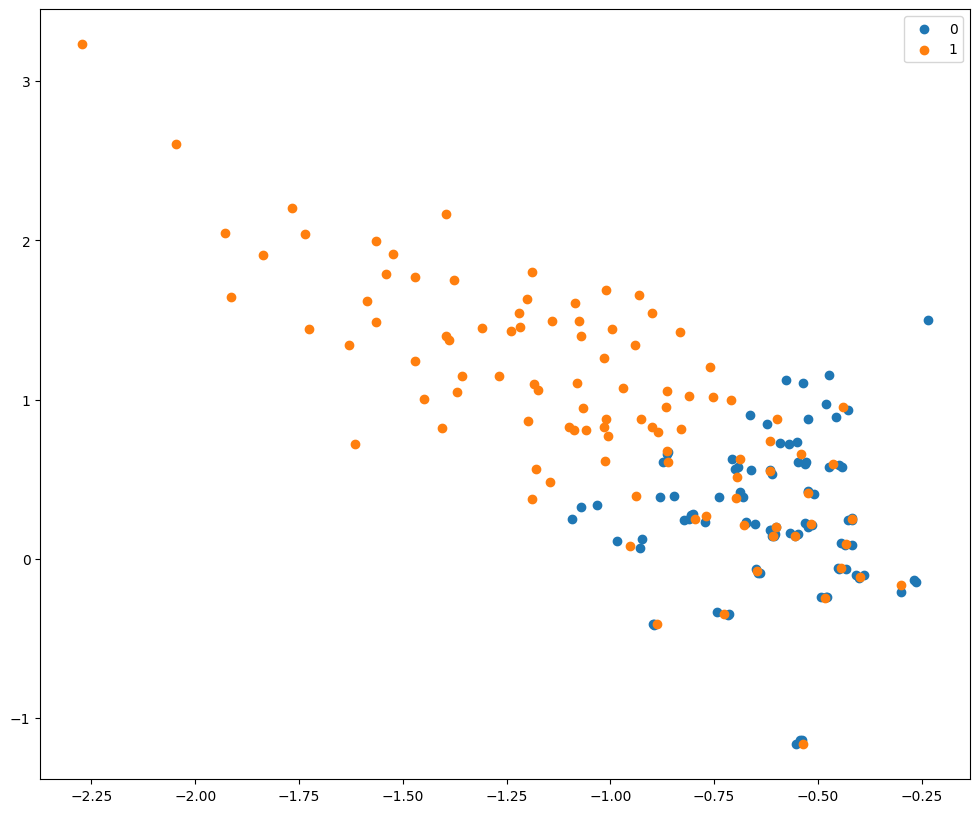

In [26]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss3.items():
  row_ix = where(y_nearmiss3 == label)[0]
  pyplot.scatter(X_nearmiss3[row_ix, 0], X_nearmiss3[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Tomek Link Undersampling

Menghapus sampel kelas mayoritas yang merupakan Tomek Link. Sampel a dan b dikatakan Tomek Link jika: (i) nearest neighbor sampel a adalah b, (ii) nearest neighbor sampel b adalah a, dan (iii) sampel a dan b memiliki kelas yang berbeda.

In [27]:
# Inisiasi undersampler dengan metode Tomek Link
tomek = TomekLinks()

# Melakukan resampling
X_tomek, y_tomek = tomek.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

Counter({0: 9882, 1: 100})


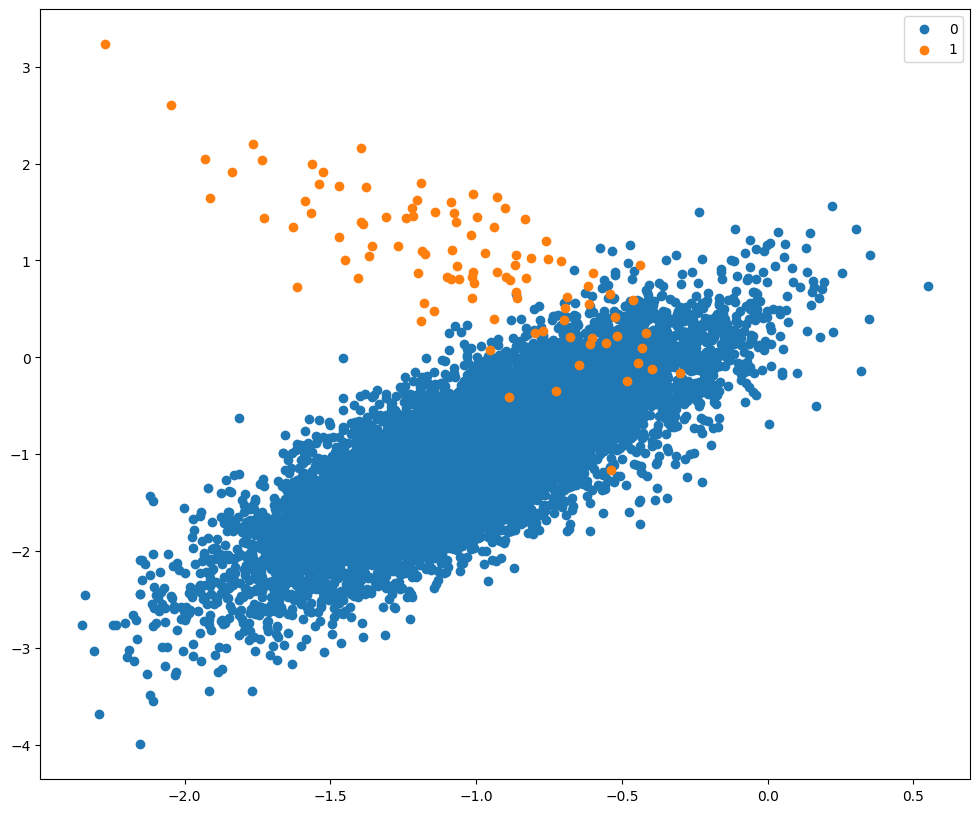

In [28]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_tomek.items():
  row_ix = where(y_tomek == label)[0]
  pyplot.scatter(X_tomek[row_ix, 0], X_tomek[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

## Cost Sensitive Learning

Salah satu cara untuk mengatasi permasalahan pada data yang imbalance, kita dapat menggunakan metode *cost sensitive learning*. Sebagian besar algoritma machine learning menganggap bahwa setiap kelas memiliki bobot yang sama, begitu juga dengan bobot kesalahan klasifikasinya. Akan tetapi, dalam banyak kasus, terutama dalam *imbalanced classification*, asumsi ini seringkali tidak berlaku. Misalnya, dalam mendeteksi email spam, mendiagnosis kondisi medis, atau mengidentifikasi penipuan, hasil *false negative* biasanya memiliki konsekuensi yang lebih mahal daripada *false positive*.

Untuk menangani hal tersebut, kita dapat menggunakan *cost matrix*, di mana bobot diberikan kepada kesalahan klasifikasi berdasarkan konsekuensinya. Penentuan bobot ini biasanya melibatkan ahli di bidang yang relevan. Sebagai alternatif, kita juga bisa menggunakan kebalikan dari distribusi kelas sebagai bobot.

Ada tiga kategori utama metode *cost sensitive learning* yang relevan dalam *imbalanced learning*, yaitu *cost sensitive resampling*, *cost sensitive algorithm*, dan *cost sensitive ensembles*. Dalam lab ini, kita akan mencoba menggunakan *cost sensitive algorithm* untuk mengatasi permasalahan *imbalanced classification*. Untuk penjelasan lebih lengkap tentang *cost sensitive learning*, silakan merujuk ke slide kuliah atau sumber lain dari internet.

### Cost Sensitive Decision Tree

Dengan menggunakan model Decision Tree yang pernah Anda pelajari sebelumnya, kita dapat menerapkan *cost sensitive algorithm* sebagai berikut. Mari kita lihat bagaimana performa model biasa pada dataset yang telah digenerate sebelumnya.

In [29]:
decision_tree = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9935
f1_macro score: 0.834955199661682
precision_micro score: 0.9937000000000001
precision_macro score: 0.8436875881030644
recall_micro score: 0.9936
recall_macro score: 0.8434848484848484


Selanjutnya, kita akan menerapkan *cost sensitive algorithm* dengan menambahkan bobot pada setiap kelas. Karena pada dataset ini kelas 0 memiliki 9900 sample dan kelas 1 memiliki 100 sample, kita akan menerapkan bobot berkebalikan dengan distribusinya menjadi seperti berikut. Akan tetapi, perlu diperhatikan bahwa mungkin saja pengaturan bobot lain berdampak lebih baik seperti 1:2 dan sebagainya. Bobot yang tidak sesuai seperti terlalu besar pada kelas minoritas dapat menurunkan performa model akibat overfitting pada kelas minoritas.

In [30]:
weights = {0:100, 1:9900}

decision_tree = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9941000000000001
f1_macro score: 0.8412864697525976
precision_micro score: 0.9942
precision_macro score: 0.8893952628160602
recall_micro score: 0.9945999999999999
recall_macro score: 0.8188888888888888


Perhatikan hasil scorenya, khususnya untuk score macro-nya. Dalam kasus ini, *cost sensitive learning* berhasil memperbaiki sedikit klasifikasi model Decision Tree.

# Neural Network

Neural Network adalah sebuah algoritma umum dalam machine learning yang bekerja secara mirip dengan saraf (neuron) di dalam otak manusia. Multi Layer Perceptron (MLP) adalah salah satu jenis Neural Network yang terdiri dari perceptron yang disusun menjadi beberapa layer. Ilustrasi artificial neuron dalam Neural Network dapat dilihat pada gambar di bawah ini:

<center>
<img src="https://drive.google.com/uc?id=1Si4Jx4AzjOfUAGQQaQcfmJfUNWj_s3GT" alt="Neural Network"/>
</center>


Dalam ilustrasi di atas, kita bisa melihat bahwa tiap perceptron memiliki bobot (atau weight) untuk masing-masing input. Setiap input kemudian akan dikalikan dengan bobotnya dan hasilnya dijumlahkan secara keseluruhan. Selain itu, ada pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan selesai, hasilnya akan dimasukkan ke dalam fungsi aktivasi (activation function) yang akan menghasilkan keluaran (output). Terdapat beberapa jenis fungsi aktivasi, seperti TanH, ReLU, dan lainnya, yang dapat ditemukan dalam ilustrasi di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input dan bias didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Untuk perhitungan update nilai weight yang lebih detail dapat dilihat dan dipelajari pada slide perkuliahan.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide perkuliahan Data Mining 2019
- Slide perkuliahan KASDD 2022

Neural Network dapat digunakan untuk menyelesaikan permasalahan machine learning, termasuk klasifikasi. Kita dapat menggunakan `MLPClassifier` yang telah tersedia pada library `scikit-learn`.

# Pipeline

Setelah memahami teknik oversampling dan undersampling serta melakukan klasifikasi menggunakan Neural Network, kita dapat menggabungkan semua hal tersebut ke dalam sebuah pipeline. Untuk implementasinya, kita akan menggunakan Pipeline dari library `imbalanced-learn`, seperti berikut:

In [31]:
# Membuat classifier MLP
classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(40,60,20),
    solver='adam',
    random_state=42,
)

# Membuat pipeline
steps = [('over', SMOTE()), ('model', classifier)]
pipeline = Pipeline(steps=steps)

Setelah membuat pipeline, kita dapat mengevaluasi hasil klasifikasi dengan cross-validation. Akan tetapi, kita perlu menggunakan versi yang stratified karena dataset yang imbalance. Mengapa? Silakan pelajari kembali pada slide perkuliahan.

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9556000000000001
f1_macro score: 0.6281711224759248
precision_micro score: 0.9504999999999999
precision_macro score: 0.5827508383154851
recall_micro score: 0.9551999999999999
recall_macro score: 0.8954545454545455


# Soal

## Deskripsi Dataset

Dataset yang digunakan untuk lab ini adalah dataset yang sama dengan Lab 4, yaitu **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap tinggi atau rendahnya kualitas dari suatu Red Wine yang diukur dengan angka **0 (kualitas rendah)** dan **1 (kualitas tinggi)**.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:

*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **is_high_quality**: Variabel keluaran (berdasarkan data sensori, skor 0 atau 1).

In [33]:
# Membuka dataset dan menampilkannya
df = pd.read_csv('./train.csv')
df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_high_quality
0,56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,0
1,1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,0
2,1364,7.2,0.605,0.02,1.9,0.096,10.0,31.0,0.99500,3.46,0.53,11.8,0
3,1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1
4,1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1533,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,0
1275,508,10.0,0.590,0.31,2.2,0.090,26.0,62.0,0.99940,3.18,0.63,10.2,0
1276,1172,9.7,0.420,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3,0
1277,1027,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,0


## Data Awal [10]

Pada tahap ini, kita akan melihat distribusi wine yang berkualitas tinggi (`is_high_quality = 1`) dan yang berkualitas rendah (`is_high_quality = 0`).

### a. Ambil data (density & alcohol) untuk X dan data (is_high_quality) untuk y. Jangan lupa untuk memastikan X dan y dalam format **array**. [3]

In [34]:
x_train = df[["density", "alcohol"]].values
y_train = df["is_high_quality"].to_numpy()

### b. Hitung jumlah masing-masing target (Hint: Counter) [3]

In [35]:
counterY = Counter(y_train)
print(counterY)

Counter({0: 1105, 1: 174})


### c. Visualisasikan data [4]

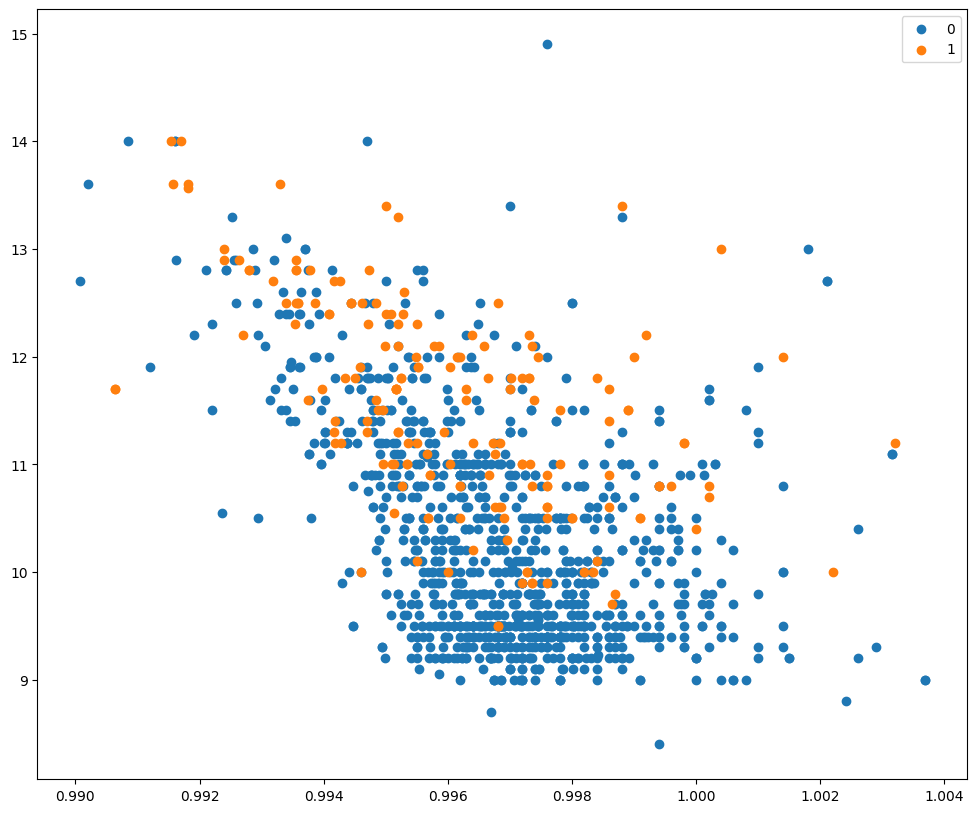

In [36]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counterY.items():
  row_ix = where(y_train == label)[0]
  pyplot.scatter(x_train[row_ix, 0], x_train[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

## Menerapkan Teknik Oversampling [25]

Pada tahap ini, kita akan mencoba melakukan oversampling pada dataset wine. Silakan pilih dua metode oversampling yang ingin Anda eksplorasi atau mungkin telah Anda kuasai.

### 1. Metode 1: Synthetic Minority Oversampling (SMOTE) [10]

#### a. Lakukan Oversample pada X dan y dengan metode yang Anda pilih. [3]

In [37]:
smoteTrain = SMOTE()

x_train_smote, y_train_smote = smoteTrain.fit_resample(x_train, y_train)

#### b. Hitung jumlah (counter) target setelah di-oversample. [3]

In [38]:
counter_y_train_smote = Counter(y_train_smote)
print(counter_y_train_smote)

Counter({0: 1105, 1: 1105})


#### c. Visualisasikan data setelah di-oversample. [4]

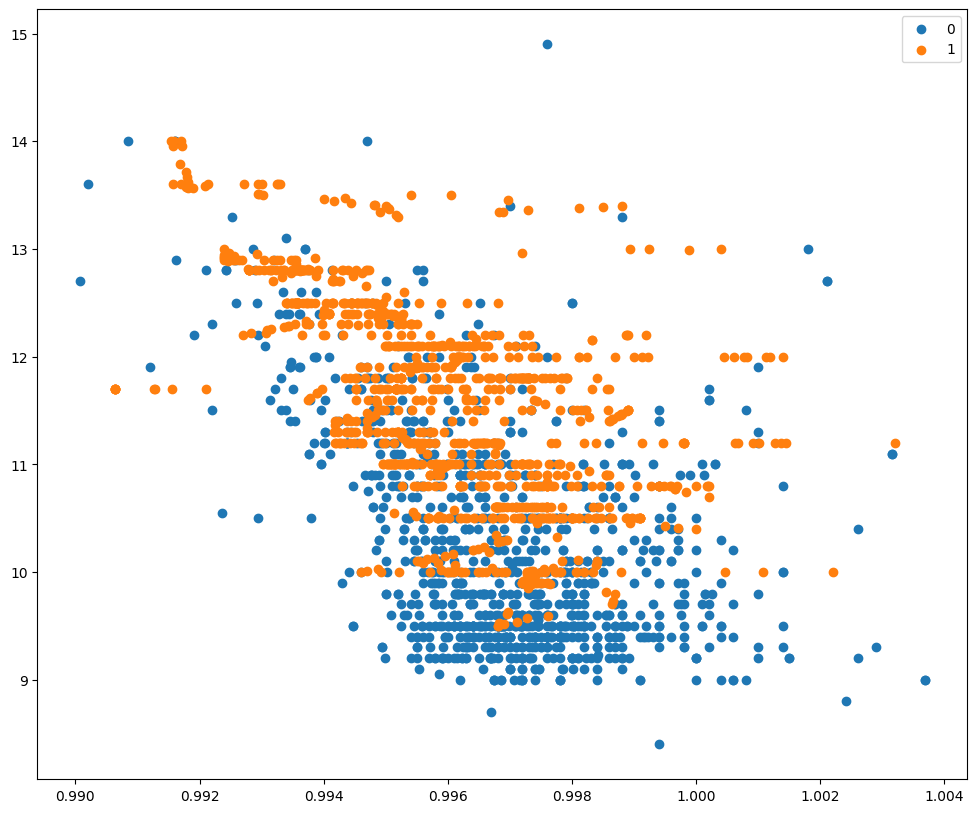

In [39]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_train_smote.items():
  row_ix = where(y_train_smote == label)[0]
  pyplot.scatter(x_train_smote[row_ix, 0], x_train_smote[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### 2. Metode 2: Random Oversampling [10]

#### a. Lakukan Oversample pada X dan y dengan metode yang Anda pilih. [3]

In [40]:
randomTrain = RandomOverSampler(
    sampling_strategy='minority'
)

x_train_random, y_train_random = randomTrain.fit_resample(x_train, y_train)

#### b. Hitung jumlah (counter) target setelah di-oversample. [3]

In [41]:
counter_y_train_random = Counter(y_train_random)
print(counter_y_train_random)

Counter({0: 1105, 1: 1105})


#### c. Visualisasikan data setelah di-oversample. [4]

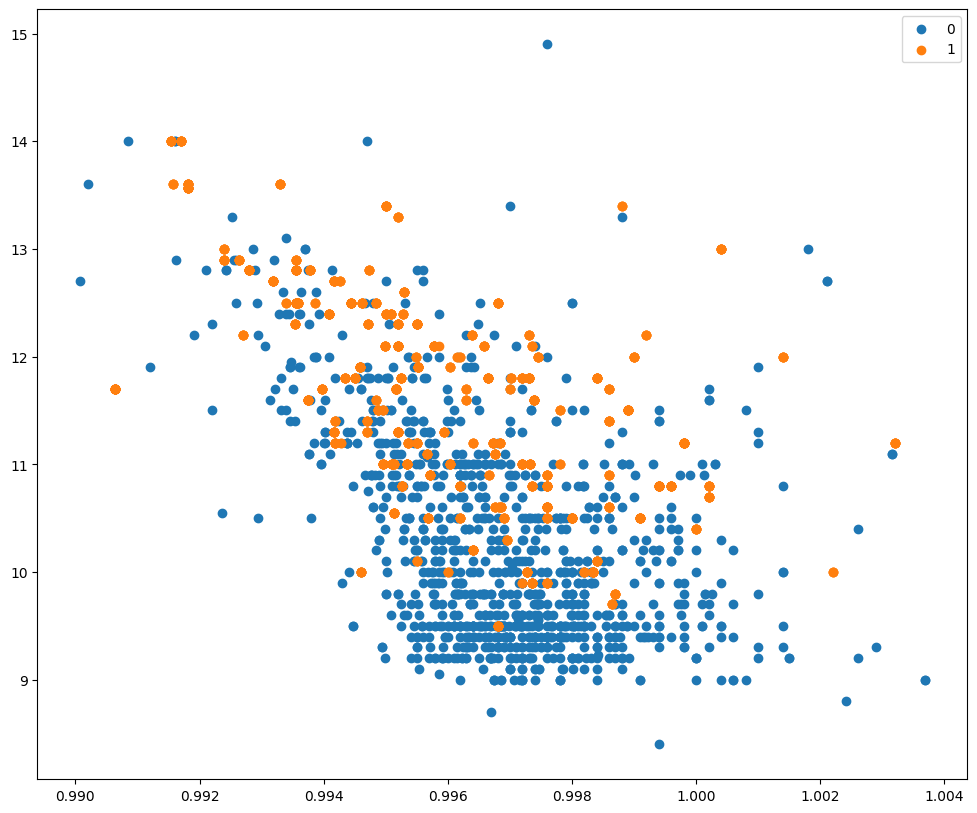

In [42]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_train_random.items():
  row_ix = where(y_train_random == label)[0]
  pyplot.scatter(x_train_random[row_ix, 0], x_train_random[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### 3. Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode oversampling yang Anda pilih? Jelaskan! [5]

Terlihat pada hasil plot terlampir di atas bahwa metode oversampling dengan menggunakan metode random oversample memiliki visualisasi plot yang tidak bebreda dengan plot pada data awal. Hal tersebut dikarenakan oversampling data dilakukan dengan menambahkan jumlah data pada titik yang sama sehingga tidak terlihat dari plot nya. Sedangkan dengan menggunakan metode SMOTE terlihat bahwa plot yang dihasilkan berbeda dan terdapat banyak pesebarang data sintetis hasil oversampling. Hal tersebut dikarenakan SMOTE membuat data sintetis dengan menentukan suatu sampel dipilih secara acak dari kelas minoritas, menentukan sampel tetangga terdekat, kemudian menambahkan data sintetis sepanjang segmen garis yang menghubungi data acak dengan data tetangganya tersebut. 

## Menerapkan Teknik Undersampling [25]

Pada tahap ini, kita akan mencoba melakukan undersampling pada dataset wine. Seperti sebelumnya, silakan pilih dua metode undersampling yang ingin Anda eksplorasi atau mungkin telah Anda kuasai.

### 1. Metode 1: Random Undersampling [10]

#### a. Lakukan Undersample pada X dan y dengan metode yang Anda pilih. [3]

In [43]:
# Inisiasi undersampler dengan metode random undersampling
train_randomUnder = RandomUnderSampler(
    sampling_strategy='majority'
)

# Melakukan resampling
x_train_randomUnder, y_train_randomUnder = train_randomUnder.fit_resample(x_train, y_train)

#### b. Hitung jumlah (counter) target setelah di-undersample. [3]

In [44]:
# Melihat distribusi kelas pada dataset
counter_train_y_randomUnder = Counter(y_train_randomUnder)
print(counter_train_y_randomUnder)

Counter({0: 174, 1: 174})


#### c. Visualisasikan data setelah di-undersample. [4]

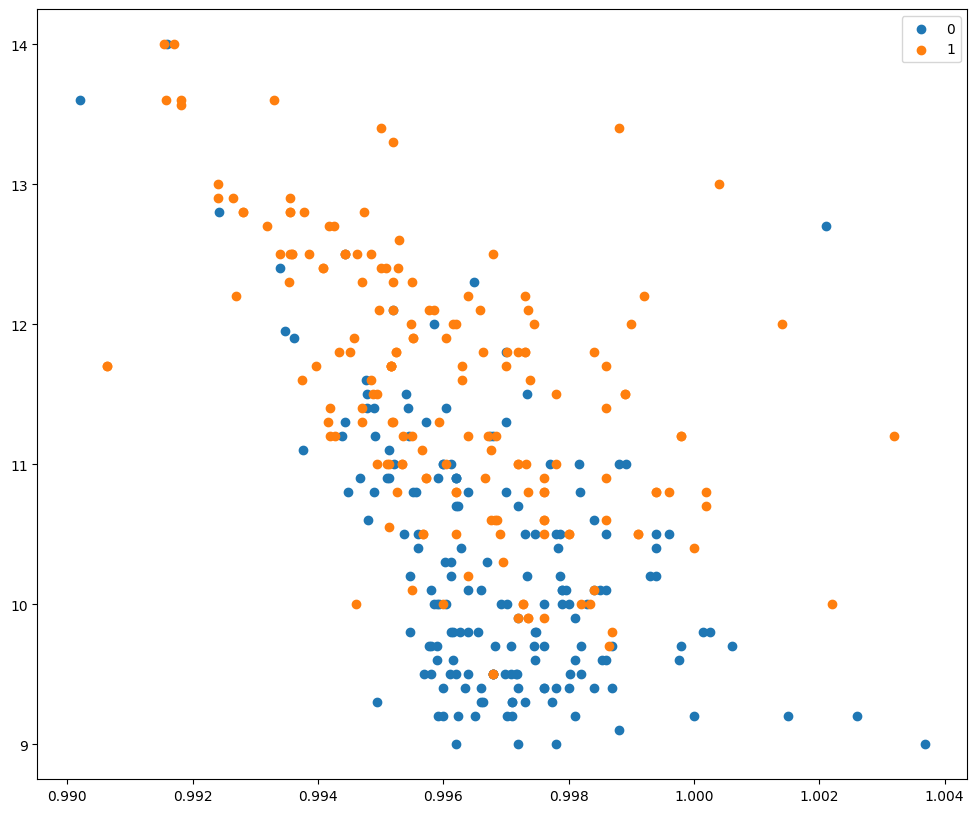

In [45]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_train_y_randomUnder.items():
  row_ix = where(y_train_randomUnder == label)[0]
  pyplot.scatter(x_train_randomUnder[row_ix, 0], x_train_randomUnder[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### 2. Metode 2: NearMiss-1 [10]

#### a. Lakukan Undersample pada X dan y dengan metode yang Anda pilih. [3]

In [46]:
# Inisiasi undersampler dengan metode Near Miss 1
train_nearmiss = NearMiss()

# Melakukan resampling
x_train_nearmiss, y_train_nearmiss = train_nearmiss.fit_resample(x_train, y_train)

#### b. Hitung jumlah (counter) target setelah di-undersample. [3]

In [47]:
# Melihat distribusi kelas pada dataset
counter_train_y_nearmiss = Counter(y_train_nearmiss)
print(counter_train_y_nearmiss)

Counter({0: 174, 1: 174})


#### c. Visualisasikan data setelah di-undersample. [4]

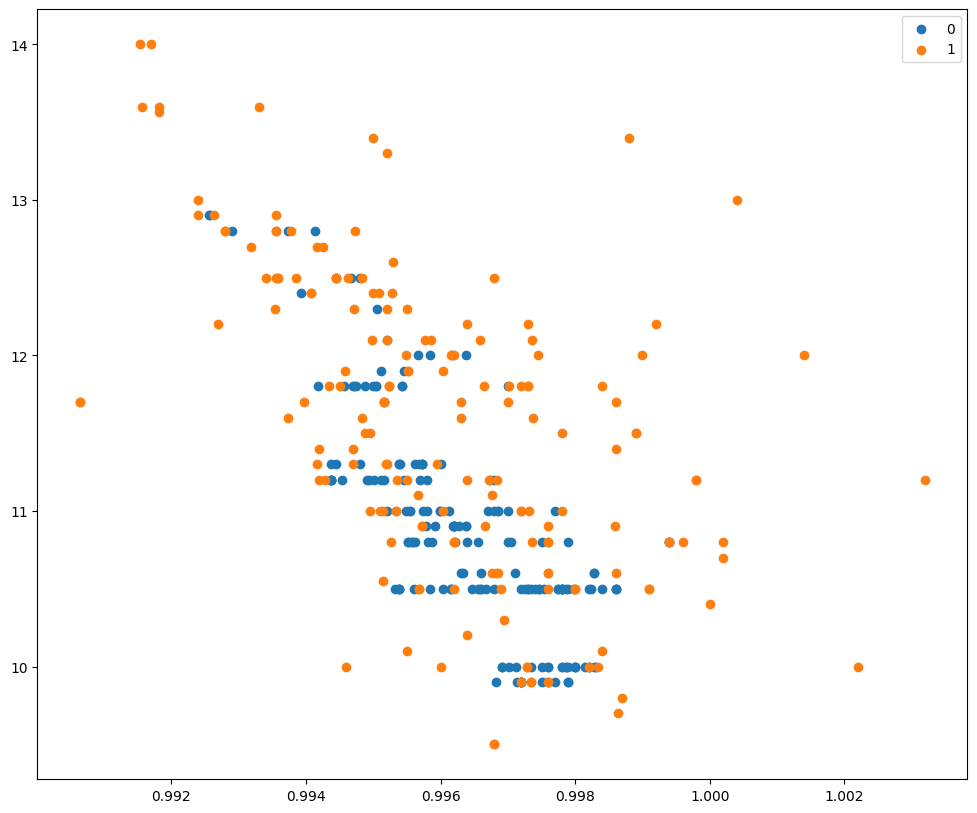

In [48]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_train_y_nearmiss.items():
  row_ix = where(y_train_nearmiss == label)[0]
  pyplot.scatter(x_train_nearmiss[row_ix, 0], x_train_nearmiss[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### 3. Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode undersampling yang Anda pilih? Jelaskan! [5]

Terdapat perbedaan yang cukup jelas pada gambar plot dari metode random undersampling dan metode nearmis versi 1 di atas. Untuk metode random undersampling sendiri penghapusan data pada kelas mayoritas (kelas yang memiliki jumlah data lebih banyak) dilakukan secara acak. Sedangkan untuk metode nearmiss versi 1 yang dilakukan adalah dengan mempertahankan data mayoritas yang memiliki jarak rata-rata paling dekat dengan sampel kelas minoritas. Dapat dilihat di atas pada plot di atas bahwa data kelas mayoritas yang tersisa adalah yang berada berdekatan dengan data kelas minoritas. Sedangkan untuk random undersampling data kelas mayoritas yang diundersampling cukup sulit dilihat polanya sesuai dengan metodenya yang memang menghapus data kelas mayoritas secara acak 

## Melakukan klasifikasi dengan Cost Sensitive Learning [10]

Pada tahap ini, silakan melakukan klasifikasi menggunakan Decision Tree yang telah diterapkan *cost sensitive algorithm*. Perhatikan bahwa data yang harus digunakan adalah data awal sebelum sampling.

### Tanpa *cost sensitive learning* [4]

#### a. Buatlah model Decision Tree Classifier. [2]

In [49]:
train_decision_tree = DecisionTreeClassifier()

#### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [50]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(train_decision_tree, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8451960784313725
f1_macro score: 0.6694663251471633
precision_micro score: 0.8467585784313725
precision_macro score: 0.6694696687741947
recall_micro score: 0.8451960784313725
recall_macro score: 0.6690820943762119


### Dengan *cost sensitive learning* [4]

Silakan eksplorasi mengenai bobot yang baik untuk meningkatkan performa model Decision Tree.

#### a. Buatlah model Decision Tree Classifier lakukan prediksi pada data awal sebelum sampling. [2]

In [107]:
train_weights = {0:100, 1:99}

train_decision_tree_weight = DecisionTreeClassifier(class_weight=train_weights)

#### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [108]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(train_decision_tree_weight, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8459803921568628
f1_macro score: 0.667160910955026
precision_micro score: 0.8459834558823529
precision_macro score: 0.6664575916490546
recall_micro score: 0.8459803921568627
recall_macro score: 0.6661409179056238


### Berikan analisis Anda mengenai dampak *cost sensitive learning* terhadap hasil klasifikasi model Decision Tree Classifier dan alasannya! [2]

Terlihat pada hasil perlakuan pembedaan bobt yang dilakukan pada kedua kelas yang diubah bahwa cost sensitive learning berhasil memperbaiki sedikit skor macro hasil klasifikasi model decision tree di atas. Hal tersebut dikarenakan kondisi data yang tidak seimbang sehingga pemberian bobot yang tepat kemudian dapat mempengaruhi terhadap perhitungan skor model decision tree. Pada umumnya pemberian bobot yang lebih besar akan diberikan kepada kelas minoritas untuk mengurangi bias, namun pada percobaan di atas hal yang dilakukan malah sebaliknya. Salah satu penyebab nya adalah karena karakteristik data pada kelas minoritas yang mungkin saja sulit untuk diprediksi sehingga model akan memberikan skor yang lebih baik jika lebih berfokus pada kelas mayoritas

## Melakukan klasifikasi dengan NN [30]

Pada tahap ini, kita akan mencoba melakukan klasifikasi dengan classifier yang mengimplementasikan Neural Network, yaitu MLPClassifier. Untuk setiap case, buatlah 3 model dengan spesifikasi yang diperintahkan.

### Klasifikasi pada data awal [10]

#### Case 1 [3]

##### a. Buatlah MLPClassifier yang memiliki 1 hidden layer berukuran 100 dengan fungsi aktivasi ReLU. [1]

In [53]:
train_classifier1 = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(100),
    solver='adam',
    random_state=42,
    activation='relu',
)

##### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [54]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(train_classifier1, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8623835784313725
f1_macro score: 0.49698307429127675
precision_micro score: 0.8623835784313725
precision_macro score: 0.5505770999335989


recall_micro score: 0.8623835784313725
recall_macro score: 0.5159276018099547


#### Case 2 [3]

##### a. Buatlah MPLClassifier yang memiliki 3 hidden layer yang secara berurutan memiliki ukuran 100, 200, dan 20 dengan fungsi aktivasi tanh. [1]

In [55]:
train_classifier2 = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(100, 200, 20),
    solver='adam',
    random_state=42,
    activation='tanh',
)

##### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [56]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(train_classifier2, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8631740196078432
f1_macro score: 0.4632814741255655
precision_micro score: 0.8631740196078432
precision_macro score: 0.4319266732283465
recall_micro score: 0.8631740196078432
recall_macro score: 0.4995475113122172


#### Case 3 [4]

##### a. Buatlah MPLClassifier dengan performa sebaik mungkin, khususnya dalam metrik macro. Sama dengan model umumnya, MLPClassifier juga dapat dituning menggunakan GridSearchCV. Silakan mereview Lab 4 atau 5 jika lupa cara mengimplementasikannya, ya! [2]

> Hyperparamter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
model = MLPClassifier()
tunned_params = [{
    'alpha': [1e-5],
    'hidden_layer_sizes': [(100, 20, 10), (80, 20), (30)],
    'solver': ['adam'],
    'random_state' : [42],
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}]

print("Tuning hyper-parameters model MLP Classifier")
print()

tuning = GridSearchCV(
    model,
    tunned_params,
    scoring="f1_macro",
    cv=cv,
    verbose = 2
)

tuning.fit(x_train, y_train)


Tuning hyper-parameters model MLP Classifier

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.2s
[CV] EN

d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.3s
[CV] END acti

d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.3s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.3s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.3s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=1e-05, hi

d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.7s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 20, 10), random_state=42, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(80, 20), random_state=42, solver=adam; total time=   0.7s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.0s


d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=30, random_state=42, solver=adam; total time=   0.1s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(),
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'alpha': [1e-05],
                          'hidden_layer_sizes': [(100, 20, 10), (80, 20), 30],
                          'random_state': [42], 'solver': ['adam']}],
             scoring='f1_macro', verbose=2)

> Cetak konfigurasi hyperparameter terbaik, kemudian buatlah MPLClassifier dengan hyperparameter tersebut.

In [58]:
print("Best parameters set found on development set:")
print(tuning.best_params_)

Best parameters set found on development set:
{'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 20, 10), 'random_state': 42, 'solver': 'adam'}


##### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [59]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(tuning.best_estimator_, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8647273284313725
f1_macro score: 0.5364780143067294
precision_micro score: 0.8647273284313725
precision_macro score: 0.710568625805825
recall_micro score: 0.8647273284313725
recall_macro score: 0.5390109890109891


### Klasifikasi pada data yang telah di-undersample [10]

Pada tahap ini, silakan pilih salah satu metode yang telah Anda pilih sebelumnya pada tahap Menerapkan Teknik Undersampling.

> Saya menggunakan metode Nearmiss versi 1

#### Case 1 [3]

##### a. Dengan spesifikasi yang sama dengan data awal Case 1, definisikan MLPClassifier dan pipeline (wajib). [1]

In [60]:
underSteps = [('over', NearMiss()), ('model', train_classifier1)]

underPipeline1 = Pipeline(steps=underSteps)

##### b. Evaluasi pipeline menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. [2]

In [61]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(underPipeline1, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.7207475490196078


f1_macro score: 0.6126411693779689
precision_micro score: 0.7207475490196078
precision_macro score: 0.6238809821963951
recall_micro score: 0.7207475490196078
recall_macro score: 0.7157401422107303


#### Case 2 [3]

##### a. Dengan MLPClassifier data awal Case 2, definisikan pipeline (wajib). [1]

In [62]:
underSteps2 = [('over', NearMiss()), ('model', train_classifier2)]

underPipeline2 = Pipeline(steps=underSteps2)

##### b. Evaluasi pipeline menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. [2]

In [63]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(underPipeline2, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.6811305147058824
f1_macro score: 0.5394497464761491
precision_micro score: 0.6811305147058824
precision_macro score: 0.5307794324382187
recall_micro score: 0.6811305147058824
recall_macro score: 0.6422171945701358


#### Case 3 [4]

##### a. Sama seperti data awal, buatlah MPLClassifier dengan performa sebaik mungkin, khususnya dalam metrik macro. Dengan menggunakan pipeline, silakan lakukan hyperparameter tuning. Silakan eksplorasi bagaimana cara hyperparameter tuning pada pipeline! [2]

> Hyperparameter Tuning

In [64]:
lastCLassifier = MLPClassifier(random_state=42)
lastPipeline = Pipeline([
    ('over', NearMiss()),
    ('model', lastCLassifier),
])

param_grid = [{
    'model__alpha': [1e-5],
    'model__hidden_layer_sizes': [(100, 20, 10), (80, 20), (30)],
    'model__solver': ['adam'],
    'model__random_state' : [42],
    'model__activation': ['identity', 'logistic', 'tanh', 'relu']
}]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

searching = GridSearchCV(lastPipeline, param_grid, scoring='f1_macro', cv=cv, n_jobs=-1)
searching.fit(x_train, y_train)

d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('over', NearMiss()),
                                       ('model',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model__activation': ['identity', 'logistic', 'tanh',
                                                'relu'],
                          'model__alpha': [1e-05],
                          'model__hidden_layer_sizes': [(100, 20, 10), (80, 20),
                                                        30],
                          'model__random_state': [42],
                          'model__solver': ['adam']}],
             scoring='f1_macro')

> Cetak konfigurasi hyperparameter terbaik, kemudian buatlah MPLClassifier dengan hyperparameter tersebut serta definisikan pipeline (wajib).

In [65]:
print("Best parameters set found on development set:")
print(searching.best_params_)

Best parameters set found on development set:
{'model__activation': 'tanh', 'model__alpha': 1e-05, 'model__hidden_layer_sizes': 30, 'model__random_state': 42, 'model__solver': 'adam'}


##### b. Evaluasi pipeline menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. [2]

In [66]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(searching.best_estimator_, x_train, y_train, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8045189950980391


f1_macro score: 0.6658559512503838
precision_micro score: 0.8045189950980391
precision_macro score: 0.6476367117252526
recall_micro score: 0.8045189950980391
recall_macro score: 0.7148028442146088


### Pertanyaan dan Analisis hasil klasifikasi [10]

#### Dalam membandingkan performa model pada data yang imbalance, manakah yang lebih baik antara metrik micro dan macro? Jelaskan! [5]

> Metrik micro memberikan bobot yang sama untuk setiap sampel sedangkan metrik macro memberikan bobot yang sama untuk setiap kelas. Oleh karena itu kelas yang memiliki jumlah sedikit maka pembobotan kelas tersebut akan secara otomatis sedikit jika menggunakan metrik micro yang kemudian terancam terabaikan data-datanya. Dengan metrik macro kita memberikan data bobot yang sama untuk kedua kelas terlepas dari jumlah sampelnya sehingga akan lebih baik jika menggunakan metrik macro.

#### Berikan hasil analisis Anda setelah mencoba menerapkan klasifikasi pada data awal dan data yang telah di-undersample. Bandingkan skor metrik metrik micro dan macro pada setiap case juga antara data awal dan data yang telah di-undersample. Selain itu, berikan juga analisis Anda mengenai pengaruh hyperparameter MLPClassifier terhadap hasil klasifikasi. [5]

> Data yang sudah di-undersample memiliki skor metrik macro yang lebih besar dan skor metrik micro yang lebih kecil jika dibandingkan dengan dengan data awal. Data minoritas yang sudah di-undersample akan memiliki jumlah data yang hampir sama dengan jumlah data kelas mayoritas. Maka nilai makro berperilaku normal jika lebih tinggi pada data yang sudah di-undersample karena jumlah data pada kedua kelas sudah sama. Sedangkan metrik mikro memberikan bobot yang sama pada setiap sampel sehingga performa model pada data kelas mayoritas yang memiliki banyak sampel akan berkurang karena jumlag data yang sudah disamaratakan sehingga nilai mikronya akan lebih kecil.

> Hyperparameter pada model MLPClassifier memiliki pengaruh yang cukup penting. Dapat dilihat pada hasil evaluasi skor di atas dengan menentukan hyperparameter yang tepat kita dapat meningkatkan skor dari model yang kita miliki, baik untuk skor metrik macro maupun micro. Untuk menentukan hyperparameter yang tepat kita dapat menggunakan hyperparameter tuning yang akan mencoba semua kemungkinan hyperparameter ynag kita berikan dan kemudian mengembalikan kombinasi hyperparameter terbaik.

# Eksplorasi [Kaggle Competition](https://www.kaggle.com/t/146d6327e6304bc7a5a3f1d14541227b)

Pada tahap ini, silakan lakukan eskplorasi dalam melakukan klasifikasi pada dataset yang diberikan seperti fitur dan hyperparameter. Perhatikan bahwa Anda hanya diperbolehkan menggunakan MLPClassifier dan melakukan training pada dataset `train.csv`. Apabila hasil prediksi pada `test.csv` pada Kaggle tidak sesuai dengan notebook ini, maka akan dianggap **tidak valid**.

In [67]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

In [68]:
x_test_early = pd.read_csv('./test.csv')
trainDf = pd.read_csv('./train.csv')
trainDf

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_high_quality
0,56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,0
1,1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,0
2,1364,7.2,0.605,0.02,1.9,0.096,10.0,31.0,0.99500,3.46,0.53,11.8,0
3,1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1
4,1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1533,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,0
1275,508,10.0,0.590,0.31,2.2,0.090,26.0,62.0,0.99940,3.18,0.63,10.2,0
1276,1172,9.7,0.420,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3,0
1277,1027,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,0


In [69]:
x_train_end = trainDf.drop(["is_high_quality", "id"], axis=1)
x_test = x_test_early.drop('id', axis=1)
x_train_end 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
1,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7
2,7.2,0.605,0.02,1.9,0.096,10.0,31.0,0.99500,3.46,0.53,11.8
3,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
4,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1275,10.0,0.590,0.31,2.2,0.090,26.0,62.0,0.99940,3.18,0.63,10.2
1276,9.7,0.420,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3
1277,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6


In [70]:
y_train_lab = df["is_high_quality"]

In [71]:
doingCLassifier = MLPClassifier(random_state=42)

doingPipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('over', SMOTE(random_state=42)),
    ('model', doingCLassifier),
])
param_grid = [{
    'over__sampling_strategy': [0.5, 0.75, 1.0],
    'over__k_neighbors': [3, 5, 7],
    'model__alpha': [1e-5],
    'model__hidden_layer_sizes': [(100, 20, 10), (50, 50, 50), (70)],
    'model__solver': ['adam'],
    'model__activation': ['tanh', 'relu'],
    'model__learning_rate_init': [0.01],
    'model__max_iter': [200],
    'model__tol': [1e-4],
    'model__n_iter_no_change': [10],
    'model__early_stopping': [True, False],
    'model__validation_fraction': [0.1, 0.2]
}]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

parameter_tuning = GridSearchCV(doingPipeline, param_grid, scoring='f1_macro', cv=cv, n_jobs=-1)
parameter_tuning.fit(x_train_end, y_train_lab)

d:\KULIAH\kasdad\lab7\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('over', SMOTE(random_state=42)),
                                       ('model',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model__activation': ['tanh', 'relu'],
                          'model__alpha': [1e-05],
                          'model__early_stopping': [True, False],
                          'model__hidden_layer_sizes': [(100, 20, 10),
                                                        (50, 50, 50), 70],
                          'model__learning_rate_init': [0.01],
                          'model__max_iter': [200],
                          'model__n_iter_no_change': [10],
                          'model__solver': ['adam'], 'model__tol': [0.0001],
                          'model__validation_fraction': [0.1, 0.2],
                          'over__k_neighbors': [3, 5, 7],
                          'over__sampling_strategy': [0.5, 0.75, 1.0]}],
             scoring='f1_macro')

In [72]:
parameter_tuning.best_params_

{'model__activation': 'tanh',
 'model__alpha': 1e-05,
 'model__early_stopping': False,
 'model__hidden_layer_sizes': 70,
 'model__learning_rate_init': 0.01,
 'model__max_iter': 200,
 'model__n_iter_no_change': 10,
 'model__solver': 'adam',
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'over__k_neighbors': 5,
 'over__sampling_strategy': 0.75}

In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(parameter_tuning.best_estimator_, x_train_end, y_train_lab, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8827144607843138
f1_macro score: 0.7593695945984082
precision_micro score: 0.8827144607843138
precision_macro score: 0.7515004022513689
recall_micro score: 0.8827144607843138
recall_macro score: 0.7695862960568843


In [74]:
final_model = parameter_tuning.best_estimator_
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('over', SMOTE(random_state=42, sampling_strategy=0.75)),
                ('model',
                 MLPClassifier(activation='tanh', alpha=1e-05,
                               hidden_layer_sizes=70, learning_rate_init=0.01,
                               random_state=42))])

In [75]:
result = final_model.predict(x_test)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
imbalanced_id = x_test_early['id']

prediction_df = pd.DataFrame({
    "id": imbalanced_id,
    "is_high_quality": result
})

prediction_df.to_csv('ImbalancedDataPrediction.csv', index=False)